In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import *
from imblearn.under_sampling import *

In [2]:
def init_ds():
    df = pd.read_csv('abalone.data', names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
    df = pd.concat([pd.get_dummies(df.Sex, prefix='Sex'), df], axis = 1)
    del df['Sex']
    return df
def train(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
    knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights = 'distance')
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, predictions)
    return round(accuracy*100,2)

### Oversampling

###### Дублирую элементы миноритарных классов, пока их не станет достаточно для SMOTE

In [3]:
df = init_ds()
print(df['Rings'].value_counts()[df['Rings'].value_counts() < 6].shape[0], "классов нужно дублировать")
ks = df['Rings'].value_counts()[df['Rings'].value_counts()<6].keys()
newdf = pd.DataFrame(np.repeat(df[df['Rings'].isin(ks)].values,6,axis=0))
newdf.columns = df.columns
df = df.append(newdf)
df['Rings'] = df['Rings'].astype(int)
print(df['Rings'].value_counts().min(), "- минимальное количество элементов в классе после преобразования")

7 классов нужно дублировать
6 - минимальное количество элементов в классе после преобразования


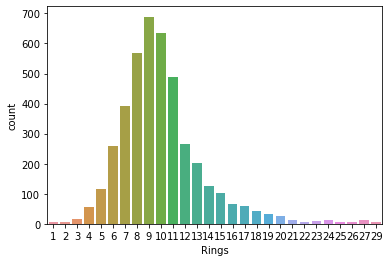

In [4]:
sns.countplot(df['Rings'])

In [5]:
X = df.iloc[:,0:10].to_numpy()
Y = df.iloc[:,10].to_numpy()
smt = SMOTE(k_neighbors=5)
X_resampled, Y_resampled = smt.fit_resample(X, Y)
print(pd.Series(Y).value_counts().median(), pd.Series(Y_resampled).value_counts().median())

49.5 689.0


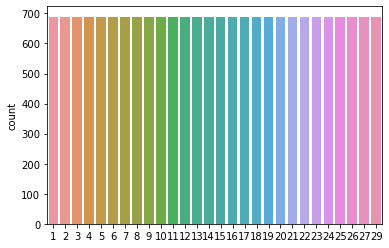

In [6]:
sns.countplot(Y_resampled)

In [7]:
print("Accuracy score : ", train(X_resampled, Y_resampled))

Accuracy score :  74.5


### Undersampling + Oversampling

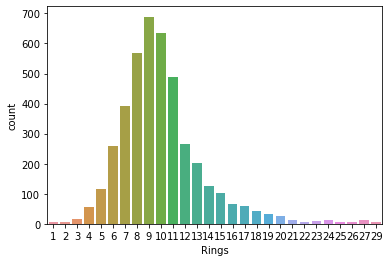

In [8]:
sns.countplot(df['Rings'])

###### Уменьшаю кол-во элементов мажоритарных классов, а потом применяю SMOTE (сперва продублировав элементы миноритарных классов)

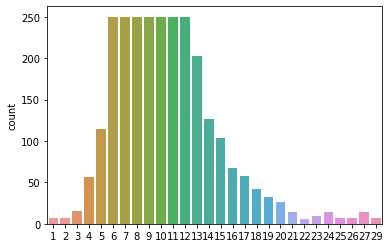

In [9]:
df = init_ds()
ks = df['Rings'].value_counts()[df['Rings'].value_counts()<6].keys()
newdf = pd.DataFrame(np.repeat(df[df['Rings'].isin(ks)].values,6,axis=0))
newdf.columns = df.columns
df = df.append(newdf)
df['Rings'] = df['Rings'].astype(int)
#----------------------
X = df.iloc[:,0:10].to_numpy()
Y = df.iloc[:,10].to_numpy()
undersample = RandomUnderSampler(sampling_strategy={6:250,7:250,8:250,9:250, 10:250,11:250,12:250,})
X_resampled, Y_resampled = undersample.fit_resample(X, Y)
sns.countplot(Y_resampled)

In [10]:
smt = SMOTE(k_neighbors=5)
X_resampled, Y_resampled = smt.fit_resample(X_resampled, Y_resampled)

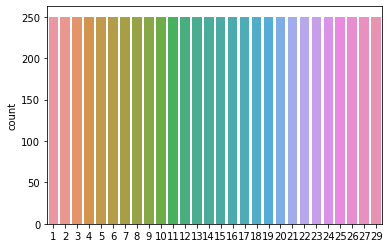

In [11]:
sns.countplot(Y_resampled)

In [12]:
print("Accuracy score : ", train(X_resampled, Y_resampled))

Accuracy score :  60.86
